# QISKIT

## Estados GHZ

Para la generacion de los estados ghz añadimos una cnot controlada a los estados de bell con el qbit 1 como qbit de control y el 2 como qbit en el que se realizará la operación

## Condiciones Idóneas (No Reales)

En esta parte observaremos como sin presencia de ruido(condiciones idoneas) el circuito se comportara siempre de la manera que esta prevista.

In [3]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Usamos el qasm_simulator de Aer
simulator1 = Aer.get_backend('qasm_simulator')
# Creamos un objeto Quantum Circuit que actúa sobre el registro cuántico por defecto (q) 
# de un bit (primer parámetro) y que tiene un registro clásico de un bit (segundo parámetro)
circuit = QuantumCircuit(3, 3)
# Añadimos una puerta Hadamard con el qubit q_0 como entrada
circuit.h(0)
circuit.cnot(0, 1)
circuit.cnot(1, 2)
# Mapeamos la medida de los qubits (primer parámetro) sobre los bits clásicos
circuit.measure([0,1,2], [0,1,2])


# Ejecutamos el circuito sobre el simulador qasm
job = execute(circuit, simulator1, shots=1000)
# Almacenamos los resultados
result = job.result()
# Capturamos las ocurrencias de salida
counts = result.get_counts(circuit)
# Escribimos el número de ocurrencias
print("\nNúmero de ocurrencias para 0 y 1:",counts)
# Dibujamos el circuito
circuit.draw()


Número de ocurrencias para 0 y 1: {'000': 490, '111': 510}


┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

Aqui se puede observar que en condiciones ideales solo existen dos salidas '111' y '000'.

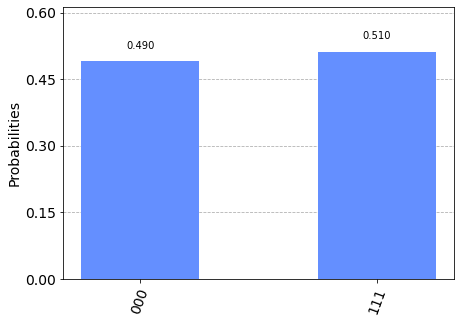

In [5]:
plot_histogram(counts)

## Condiciones no Idóneas (Reales)

En este parte observaremos como el ruido afecta al resultado de aplicar el circuito a tres qbits en condiciones no ideales(con presencia de ruido).

In [7]:
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.compiler import transpile, assemble, schedule



#No va a funcionar hasta que no pongas tu propia cuenta de IBM



IBMQ.save_account('your account', overwrite=True) 
provider = IBMQ.load_account()

### Simulacion con ruido

En este primer apartado utilizaremos modelos de ruido proporcionados de backends reales y añadiremos dicha información al simulador para que este genere las salidas que podrían ocurrir al ejecutarlos en ordenadores cuanticos reales.


Número de ocurrencias: {'000': 489, '001': 4, '010': 7, '011': 14, '100': 3, '101': 16, '110': 14, '111': 477}


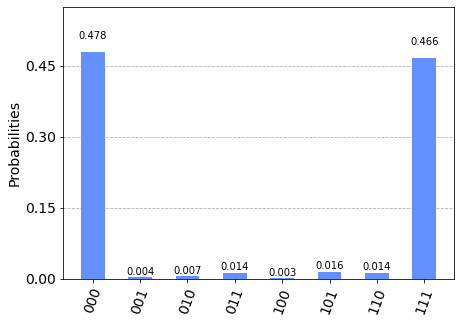

In [17]:
# Construir un modelo de ruido a partir de las características de un backend real
backend = provider.get_backend('ibmq_santiago')
noise_model = NoiseModel.from_backend(backend)

# Obtener el mapa de interconexión de los qubits
coupling_map = backend.configuration().coupling_map

# Obtener las características de las puertas básicas
basis_gates = noise_model.basis_gates

######################
# Crear circuito    #
#####################

# Perform a noise simulation

result = execute(circuit, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

######################
# Mostrar resultados #
######################

counts = result.get_counts(circuit)
print("\nNúmero de ocurrencias:",counts)
plot_histogram(counts)


Número de ocurrencias: {'000': 479, '001': 9, '010': 6, '011': 15, '100': 13, '101': 7, '110': 17, '111': 478}


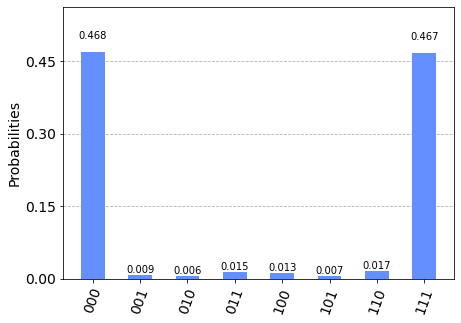

In [18]:
backend = provider.get_backend('ibmq_athens')
noise_model = NoiseModel.from_backend(backend)

# Obtener el mapa de interconexión de los qubits
coupling_map = backend.configuration().coupling_map

# Obtener las características de las puertas básicas
basis_gates = noise_model.basis_gates

######################
# Crear circuito    #
#####################

# Perform a noise simulation

result = execute(circuit, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

######################
# Mostrar resultados #
######################

counts = result.get_counts(circuit)
print("\nNúmero de ocurrencias:",counts)
plot_histogram(counts)


Número de ocurrencias: {'000': 491, '001': 9, '010': 5, '011': 17, '101': 14, '110': 10, '111': 478}


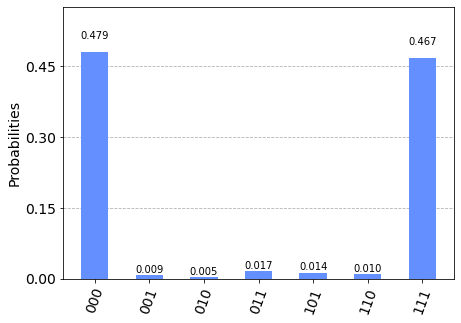

In [13]:
# Construir un modelo de ruido a partir de las características de un backend real
backend = provider.get_backend('ibmq_lima')
noise_model = NoiseModel.from_backend(backend)

# Obtener el mapa de interconexión de los qubits
coupling_map = backend.configuration().coupling_map

# Obtener las características de las puertas básicas
basis_gates = noise_model.basis_gates

######################
# Crear circuito    #
#####################

# Perform a noise simulation

result = execute(circuit, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

######################
# Mostrar resultados #
######################

counts = result.get_counts(circuit)
print("\nNúmero de ocurrencias:",counts)
plot_histogram(counts)


Número de ocurrencias: {'000': 476, '001': 24, '010': 6, '011': 22, '100': 11, '101': 60, '110': 28, '111': 397}


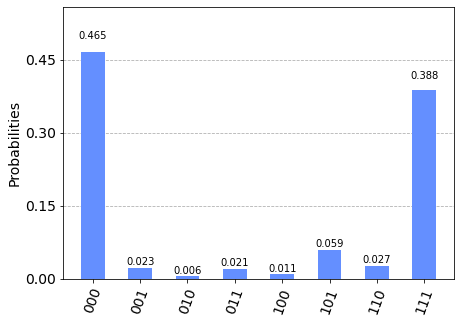

In [14]:
# Construir un modelo de ruido a partir de las características de un backend real
backend = provider.get_backend('ibmq_belem')
noise_model = NoiseModel.from_backend(backend)

# Obtener el mapa de interconexión de los qubits
coupling_map = backend.configuration().coupling_map

# Obtener las características de las puertas básicas
basis_gates = noise_model.basis_gates

######################
# Crear circuito    #
#####################

# Perform a noise simulation

result = execute(circuit, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

######################
# Mostrar resultados #
######################

counts = result.get_counts(circuit)
print("\nNúmero de ocurrencias:",counts)
plot_histogram(counts)

### Ejecucion en ordenadores cuanticos reales

En este apartado enviaremos nuestros circuitos a backends reales como ibmq_santiago y ibmq_athens proporcionados por ibm atraves de ibm quantum experience. Estos backends nos devolveran las salidas reales que nuestros circuitos generaran y podremos observar la presencia de ruido en los mismos ya que no siempre saldra la solucion deseada, lo que nos da a entender que aun queda hasta que estos ordenadores puedan ser utilizados en todo su potencial. 

In [32]:
######################
#   Crear circuito   #
######################

backend = provider.backends.ibmq_belem
qobj = assemble(transpile(circuit, backend=backend), backend=backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())

######################
# Mostrar resultados #
######################

result = job.result()
counts = result.get_counts(circuit)
print("\nNúmero de ocurrencias para 0 y 1:",counts)


Número de ocurrencias para 0 y 1: {'000': 449, '001': 18, '010': 4, '011': 17, '100': 10, '101': 20, '110': 37, '111': 469}


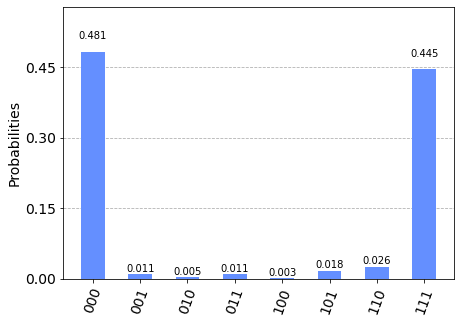

In [45]:
plot_histogram(counts)


Número de ocurrencias para 0 y 1: {'000': 478, '001': 7, '010': 3, '011': 14, '100': 13, '101': 18, '110': 11, '111': 480}


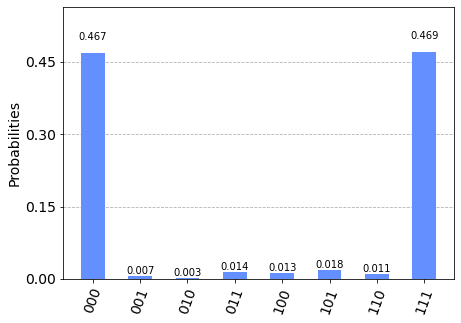

In [3]:
######################
#   Crear circuito   #
######################

backend = provider.backends.ibmq_athens
qobj = assemble(transpile(circuit, backend=backend), backend=backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())

######################
# Mostrar resultados #
######################

result = retrieved_job.result()
counts = result.get_counts(circuit)
print("\nNúmero de ocurrencias para 0 y 1:",counts)
plot_histogram(counts)

### Observaciones

Se observa q a mayor volumen cuantico menor tasa de fallos presenta el resultado en cuanto a los estados que deberian salir en condiciones idoneas.


Tambien podemos ver que aunque son diferentes los resultados dados por un computador real y su simulacion con ruido , los resultados no varian mucho ya que el modelo de ruido esta cojido de dichos ordenadores y daran resultados muy parecidos.